In [5]:
import cuspatial
import geopandas as gpd
from shapely.geometry import *
import itertools
import numpy as np
import copy

In [6]:
"""Renders a simply polygonal drawing of two Shapely Objects"""
def polygon_feature_collection(lhs, rhs, rhs_type):
    return GeometryCollection([lhs, rhs_type(rhs)])

In [27]:
"""The main polygon. A second polygon will be drawn in all of
the relationships to the main polygon.
"""
square_polygon = Polygon(
    ((0, 0), (0, 1), (1, 1), (1, 0)),
    [((0.35, 0.35), (0.35, 0.65), (0.65, 0.65), (0.65, 0.35))]
)

In [28]:
"""A manually crafted set of points that demonstrates the 8 most
obvious (to me) polygon-polygon relationships.
"""
polygon_rhs = (
    ("point-point-out", [(0.0, 1.0), (1.0, 1.0), (0.0, 1.5)]),
    ("point-point-point", [(1.0, 0.0), (0.0, 1.0), (1.0, 1.0)]),
    ("in-edge-point", [(0.5, 0.5), (0.5, 1.0), (1.0, 1.0)]),
    ("out-out-point", [(0.5, -0.25), (0.5, 1.25), (1.0, 1.0)]),
    ("in-in-point", [(0.5, 0.25), (0.5, 0.75), (1.0, 1.0)]),
    ("edge-out-point", [(0.5, 1.0), (0.5, 1.25), (1.0, 1.0)]),
    ("in-out-point", [(0.5, 0.5), (0.5, 1.25), (1.0, 1.0)]),
    ("in-point-point", [(0.5, 0.5), (0.0, 1.0), (1.0, 1.0)]),
)

point-point-out


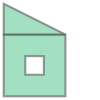

point-point-point


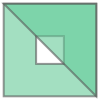

in-edge-point


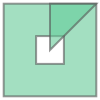

out-out-point


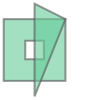

in-in-point


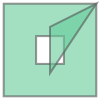

edge-out-point


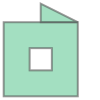

in-out-point


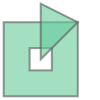

in-point-point


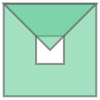

In [29]:
"""See drawings of the 8 relationships."""
for name, value in polygon_rhs:
    print(name)
    display(polygon_feature_collection(square_polygon, value, Polygon))

In [63]:
"""Now do it for every possible point position combination
of interior, exterior, edge, and point polygons.

This is performed by creating a simple triangle with
points that all satisfy one of the above conditions. The
cartesian product of point positions is built and then
points are popped from their respective triangles based
on which points are defined by the cartesian product.

inner: A triangle with 3 points inside of the inner ring,
       outside of the main polygon.
inner-point: A triangle that shares 3 points with the inner
             ring.
inner-edge: A triangle that is colinear and intersects with
            the edges of the inner ring.
in: A triangle with 3 points inside the main polygon
out: A triangle with 3 points each outside the main polygon
edge: A triangle with 3 points that are all located on the
      edge of the main polygon.
point: A triangle with 3 points that are the exact same
       points as the main polygon.
       
This test uses Shapely's `relate` function to create a
hash of the relationship that each pair of polygons has to
one another, then renders the polygon if that is the first
time we've seen that relationship.
"""
points = {
    "inner": [(0.5, 0.5), (0.55, 0.55), (0.55, 0.45)],
    "inner-point": [(0.35, 0.35), (0.35, 0.65), (0.65, 0.65)],
    "inner-edge": [(0.5, 0.65), (0.35, 0.5), (0.5, 0.35)],
    "in": [(0.75, 0.75), (0.75, 0.25), (0.25, 0.75)],
    "out": [(0.5, 1.25), (0.5, -0.25), (0.0, -0.25)],
    "edge": [(1.0, 0.5), (0.5, 0.0), (0.5, 1.0)],
    "point": [(1.0, 1.0), (1.0, 0.0), (0.0, 0.0)]
}
def get_points(triple):
    points_copy = copy.deepcopy(points)
    p1 = points_copy[triple[0][0]].pop()
    p2 = points_copy[triple[0][1]].pop()
    p3 = points_copy[triple[0][2]].pop()
    return [p1, p2, p3]

positions_triple = itertools.product(points, points, points)

(('inner', 'inner', 'inner'),)


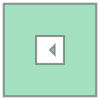

(('inner', 'inner', 'inner-point'),)


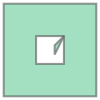

(('inner', 'inner', 'inner-edge'),)
(('inner', 'inner', 'in'),)


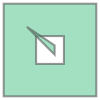

(('inner', 'inner', 'out'),)
(('inner', 'inner', 'edge'),)
(('inner', 'inner', 'point'),)
(('inner', 'inner-point', 'inner'),)
(('inner', 'inner-point', 'inner-point'),)


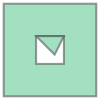

(('inner', 'inner-point', 'inner-edge'),)
(('inner', 'inner-point', 'in'),)
(('inner', 'inner-point', 'out'),)
(('inner', 'inner-point', 'edge'),)
(('inner', 'inner-point', 'point'),)
(('inner', 'inner-edge', 'inner'),)
(('inner', 'inner-edge', 'inner-point'),)
(('inner', 'inner-edge', 'inner-edge'),)
(('inner', 'inner-edge', 'in'),)
(('inner', 'inner-edge', 'out'),)
(('inner', 'inner-edge', 'edge'),)
(('inner', 'inner-edge', 'point'),)
(('inner', 'in', 'inner'),)
(('inner', 'in', 'inner-point'),)
(('inner', 'in', 'inner-edge'),)
(('inner', 'in', 'in'),)
(('inner', 'in', 'out'),)
(('inner', 'in', 'edge'),)
(('inner', 'in', 'point'),)
(('inner', 'out', 'inner'),)
(('inner', 'out', 'inner-point'),)
(('inner', 'out', 'inner-edge'),)
(('inner', 'out', 'in'),)
(('inner', 'out', 'out'),)
(('inner', 'out', 'edge'),)
(('inner', 'out', 'point'),)
(('inner', 'edge', 'inner'),)
(('inner', 'edge', 'inner-point'),)
(('inner', 'edge', 'inner-edge'),)
(('inner', 'edge', 'in'),)
(('inner', 'edge', 'ou

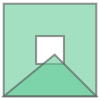

(('inner-point', 'inner', 'inner'),)
(('inner-point', 'inner', 'inner-point'),)
(('inner-point', 'inner', 'inner-edge'),)
(('inner-point', 'inner', 'in'),)
(('inner-point', 'inner', 'out'),)
(('inner-point', 'inner', 'edge'),)
(('inner-point', 'inner', 'point'),)
(('inner-point', 'inner-point', 'inner'),)
(('inner-point', 'inner-point', 'inner-point'),)
(('inner-point', 'inner-point', 'inner-edge'),)
(('inner-point', 'inner-point', 'in'),)


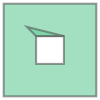

(('inner-point', 'inner-point', 'out'),)
(('inner-point', 'inner-point', 'edge'),)
(('inner-point', 'inner-point', 'point'),)
(('inner-point', 'inner-edge', 'inner'),)
(('inner-point', 'inner-edge', 'inner-point'),)
(('inner-point', 'inner-edge', 'inner-edge'),)
(('inner-point', 'inner-edge', 'in'),)
(('inner-point', 'inner-edge', 'out'),)
(('inner-point', 'inner-edge', 'edge'),)
(('inner-point', 'inner-edge', 'point'),)
(('inner-point', 'in', 'inner'),)
(('inner-point', 'in', 'inner-point'),)
(('inner-point', 'in', 'inner-edge'),)
(('inner-point', 'in', 'in'),)
(('inner-point', 'in', 'out'),)
(('inner-point', 'in', 'edge'),)


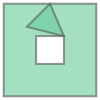

(('inner-point', 'in', 'point'),)
(('inner-point', 'out', 'inner'),)
(('inner-point', 'out', 'inner-point'),)
(('inner-point', 'out', 'inner-edge'),)
(('inner-point', 'out', 'in'),)
(('inner-point', 'out', 'out'),)
(('inner-point', 'out', 'edge'),)
(('inner-point', 'out', 'point'),)
(('inner-point', 'edge', 'inner'),)
(('inner-point', 'edge', 'inner-point'),)
(('inner-point', 'edge', 'inner-edge'),)
(('inner-point', 'edge', 'in'),)
(('inner-point', 'edge', 'out'),)
(('inner-point', 'edge', 'edge'),)
(('inner-point', 'edge', 'point'),)
(('inner-point', 'point', 'inner'),)
(('inner-point', 'point', 'inner-point'),)
(('inner-point', 'point', 'inner-edge'),)
(('inner-point', 'point', 'in'),)
(('inner-point', 'point', 'out'),)
(('inner-point', 'point', 'edge'),)
(('inner-point', 'point', 'point'),)
(('inner-edge', 'inner', 'inner'),)
(('inner-edge', 'inner', 'inner-point'),)
(('inner-edge', 'inner', 'inner-edge'),)
(('inner-edge', 'inner', 'in'),)
(('inner-edge', 'inner', 'out'),)
(('inner-

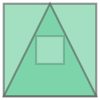

(('point', 'inner', 'inner'),)
(('point', 'inner', 'inner-point'),)
(('point', 'inner', 'inner-edge'),)
(('point', 'inner', 'in'),)
(('point', 'inner', 'out'),)
(('point', 'inner', 'edge'),)
(('point', 'inner', 'point'),)
(('point', 'inner-point', 'inner'),)
(('point', 'inner-point', 'inner-point'),)
(('point', 'inner-point', 'inner-edge'),)
(('point', 'inner-point', 'in'),)
(('point', 'inner-point', 'out'),)
(('point', 'inner-point', 'edge'),)
(('point', 'inner-point', 'point'),)
(('point', 'inner-edge', 'inner'),)
(('point', 'inner-edge', 'inner-point'),)
(('point', 'inner-edge', 'inner-edge'),)
(('point', 'inner-edge', 'in'),)
(('point', 'inner-edge', 'out'),)
(('point', 'inner-edge', 'edge'),)
(('point', 'inner-edge', 'point'),)
(('point', 'in', 'inner'),)
(('point', 'in', 'inner-point'),)
(('point', 'in', 'inner-edge'),)
(('point', 'in', 'in'),)
(('point', 'in', 'out'),)
(('point', 'in', 'edge'),)
(('point', 'in', 'point'),)
(('point', 'out', 'inner'),)
(('point', 'out', 'inner-po

In [64]:
"""Render all possible polygon shape relations."""
relate_hash = {}
for triple in zip(positions_triple):
    array = get_points(triple)
    features = polygon_feature_collection(
        square_polygon,
        array,
        Polygon
    )
    relate = square_polygon.relate(Polygon(array))
    result = relate_hash.get(relate, [])
    print(triple)
    if len(result) == 0:
        display(features)
        relate_hash[relate] = [triple]
    else:
        relate_hash[relate].append(triple)